Name: Uzair Ahmed

Email: uzairahmedwayne@hotmail.com

# Question 1

## Objective
Group retail store customers based on their purchase history using the
* Dataset: Attached with paper

## Data Analysis
* Explored the first five rows of the dataset and examined its shape for initial insights

## Data Cleaning
* Identified and removed null/missing values
* Detected and eliminated duplicate entries
* Dropped unnecessary columns
* Identified and managed outliers to ensure data quality

## ML Model
* Implemented the K-Means Clustering Algorithm for customer grouping
* Calculated WCSS (Within-Cluster Sum of Squares) values for K values ranging from 1 to 20
* Applied the elbow method to determine the optimal K value by plotting WCSS values against different K values
* Identified clusters and their corresponding data points

## Data Visualization
* Created scatter plots to visualize clusters and their data points for clear insight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [4]:
df = pd.read_csv('final-exam/data/Mall_Customers - Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

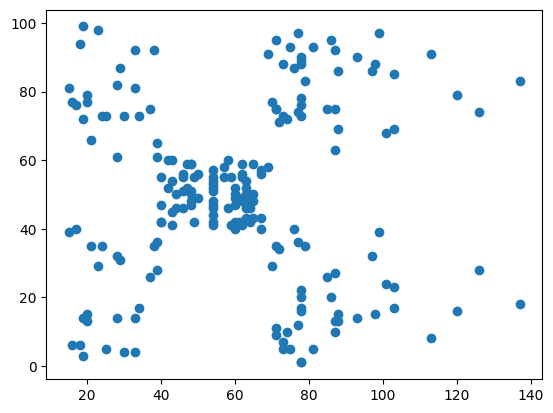

In [13]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [14]:
# Drop rows where Annual Income is < 20 or > 85
df = df[(df['Annual Income (k$)'] >= 20) & (df['Annual Income (k$)'] <= 85)]

# Verify the changes
print("Shape after dropping rows:", df.shape)

Shape after dropping rows: (154, 5)


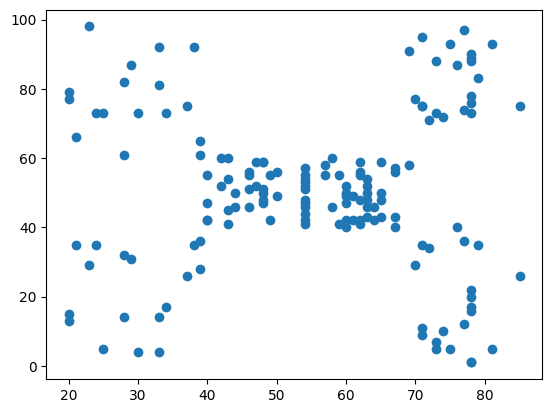

In [15]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [16]:
df = df.drop(columns=['CustomerID', 'Gender', 'Age'])

In [17]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [18]:
# Calculate WCSS values for different K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

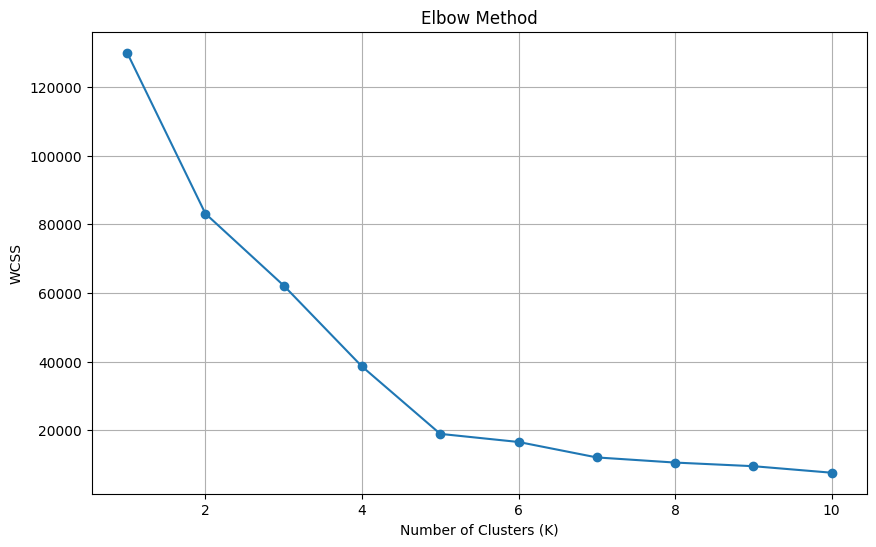

In [19]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [25]:
# Based on elbow curve, implement K-means with optimal K
optimal_k = 5  # Chosen based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

In [26]:
# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

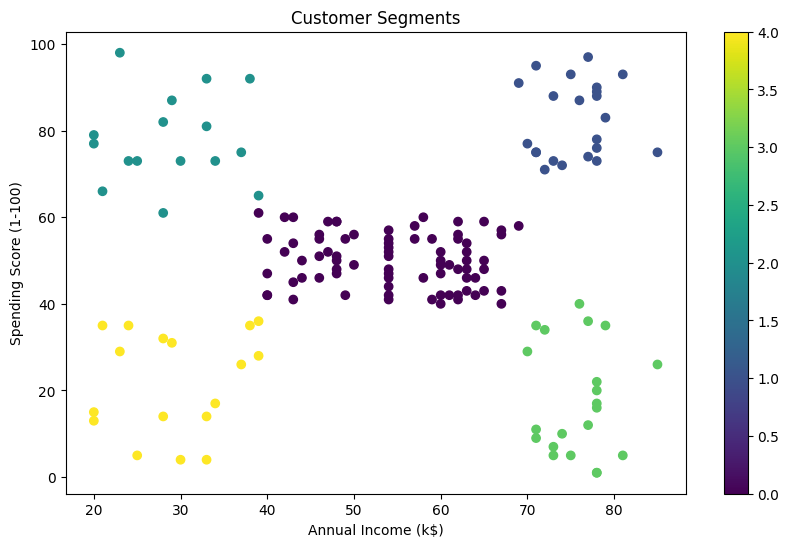

In [28]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.show()

# Titanic: The ML Challenge - A Model Build with Scikit-learn Pipelines

## Project Objectives

### 1. Pre-Processing and EDA
* Perform simple pre-processing steps
* Conduct exploratory data analysis

### 2. ML Pipeline Development
* Build a simple and reusable machine learning workflow
* Implement Scikit-learn's Pipeline Architecture

### 3. Model Optimization
* Select the best model (Random Forest / Decision Tree)
* Improve model performance through hyperparameter tuning

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [32]:
# Load and examine data
df_titanic = pd.read_csv('final-exam/data/titanic - titanic.csv')
print("Dataset Shape:", df_titanic.shape)
print("\nMissing Values:\n", df_titanic.isnull().sum())
print("\nData Info:")
print(df_titanic.info())

Dataset Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: flo

In [33]:
# Split features and target
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

In [34]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Define numeric and categorical columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [40]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

In [41]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [43]:
# Create model pipelines
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [44]:
# Define hyperparameter grids
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

dt_param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [45]:
# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [46]:
# Perform grid search for Decision Tree
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='accuracy')

In [47]:

# Print results
print("\nRandom Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)
print("\nDecision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)


Random Forest Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Best Score: 0.823076923076923

Decision Tree Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Decision Tree Best Score: 0.7964247020585049


In [48]:
# Make predictions with best models
rf_predictions = rf_grid_search.predict(X_test)
dt_predictions = dt_grid_search.predict(X_test)

In [50]:
# Print classification reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



In [52]:
# Get feature names after transformation
feature_names = (numeric_features + 
                [f"{feature}_{val}" for feature, vals in 
                 zip(categorical_features, 
                     rf_grid_search.best_estimator_.named_steps['preprocessor']
                     .named_transformers_['cat'].named_steps['onehot'].categories_) 
                 for val in vals[1:]])

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_grid_search.best_estimator_.named_steps['classifier'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [53]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
      feature  importance
4    Sex_male    0.320420
1        Fare    0.299173
0         Age    0.247762
3    Pclass_3    0.074081
6  Embarked_S    0.025828
2    Pclass_2    0.022666
5  Embarked_Q    0.010071


# COVID-19 Diagnosis Test Analysis

## Problem Statement
Data: Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually positive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.

Create confusion matrix based on given data mathematically and find:
1. Accuracy
2. Precision
3. Recall
4. F-1 score

## Given Information
* Total predictions of positive cases: 100
* True positives (TP): 45
* Total actual positive cases: 50
* Total samples: 500

## Required Calculations
* Accuracy = (TP + TN) / Total samples
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* F1 Score = 2 × (Precision × Recall) / (Precision + Recall)

# Solution for COVID-19 Diagnosis Test Analysis

## Step 1: Creating the Confusion Matrix
From the given information:
- True Positives (TP) = 45
- False Positives (FP) = 100 - 45 = 55 (predicted positive but actually negative)
- False Negatives (FN) = 50 - 45 = 5 (actual positives missed by prediction)
- True Negatives (TN) = 500 - (TP + FP + FN) = 500 - (45 + 55 + 5) = 395

Confusion Matrix:
|               | Predicted Positive | Predicted Negative |
|---------------|-------------------|-------------------|
| Actually Positive | TP = 45 | FN = 5 |
| Actually Negative | FP = 55 | TN = 395 |

## Step 2: Calculating Metrics

### 1. Accuracy
- Formula: (TP + TN) / Total samples
- Calculation: (45 + 395) / 500
- Accuracy = 0.88 or 88%

### 2. Precision
- Formula: TP / (TP + FP)
- Calculation: 45 / (45 + 55)
- Precision = 0.45 or 45%

### 3. Recall (Sensitivity)
- Formula: TP / (TP + FN)
- Calculation: 45 / (45 + 5)
- Recall = 0.90 or 90%

### 4. F1-Score
- Formula: 2 × (Precision × Recall) / (Precision + Recall)
- Calculation: 2 × (0.45 × 0.90) / (0.45 + 0.90)
- F1-Score = 0.60 or 60%

## Interpretation
- The model has high accuracy (88%) due to the large number of true negatives
- Low precision (45%) indicates high false positive rate
- High recall (90%) shows the model is good at identifying actual positive cases
- F1-score (60%) balances precision and recall, indicating moderate overall performance

# Heart Disease Dataset Analysis

## Dataset Source
Download heart dataset from [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/zhaoyingzhu/heartcsv)

## Data Analysis Tasks

### 1. Basic Data Exploration
* Find Shape of Data
* Find Missing Values
* Find data type of each column
* Identify Zero Values
* Calculate Mean age of patients

### 2. Data Preprocessing
* Extract relevant features:
  * Age
  * Sex
  * ChestPain
  * RestBP
  * Chol
* Split dataset:
  * Training set (75%)
  * Testing set (25%)

### 3. Model Evaluation
* Create confusion matrix
* Generate classification report

## Implementation Steps
Let's proceed with each task systematically to analyze the heart disease dataset.

In [55]:
df_heart = pd.read_csv('final-exam/data/Heart.csv')

In [68]:
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [65]:
# 1. Data Analysis
# Display first few rows and shape
print("Dataset Shape:", df_heart.shape)
print("\nFirst few rows:")
print(df_heart.head())

# Check data types
print("\nData Types:")
print(df_heart.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df_heart.isnull().sum())

# Check for zero values
print("\nZero Values:")
print(df_heart.eq(0).sum())

# Calculate mean age
print("\nMean Age of Patients:", df_heart['Age'].mean())

Dataset Shape: (303, 15)

First few rows:
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  

Data Types:
Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           in

In [66]:
# 2. Data Preprocessing
# Handle missing values
df_heart['Ca'].fillna(df_heart['Ca'].mean(), inplace=True)
df_heart['Thal'].fillna(df_heart['Thal'].mode()[0], inplace=True)

/tmp/ipykernel_13760/477748049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_heart['Ca'].fillna(df_heart['Ca'].mean(), inplace=True)
/tmp/ipykernel_13760/477748049.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [69]:
# Extract relevant features
features = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']
X = df_heart[features]
y = df_heart['AHD']

In [70]:
# Convert categorical variables
X = pd.get_dummies(X, columns=['ChestPain'])

In [71]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'RestBP', 'Chol']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [73]:
# 3. Model Training and Evaluation
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [76]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[28 11]
 [16 21]]


In [77]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.64      0.72      0.67        39
         Yes       0.66      0.57      0.61        37

    accuracy                           0.64        76
   macro avg       0.65      0.64      0.64        76
weighted avg       0.65      0.64      0.64        76

